In [154]:
from numpy import *
import numpy.linalg as nl
from scipy.integrate import *
import matplotlib.pyplot as plt
from scipy.special import *

In [155]:
def phi(n):
    if n==0:
        return poly1d([1])
    elif mod(n,2)==1:
        return sh_chebyt(n)-(float(n)/float(n+2))**2*sh_chebyt(n+2)
    else:
        return sh_chebyt(n) - ((float(n)/2)/(float(n)/2+1))**2*sh_chebyt(n+2)

In [225]:
m = 8
h_basis = []
h_basis.append(phi(0)/sqrt(quad(lambda t: 0.5*polyval(phi(0),t)*polyval(phi(0),t),0,1,weight='alg',wvar=(-0.5,-0.5))[0]))
for i in range(1,m):
    h_basis.append(phi(i))
    for j in range(0,i):
        h_basis[i]=h_basis[i]-quad(lambda t: 0.5*polyval(phi(i),t)*polyval(h_basis[j],t),0,1,weight='alg',wvar=(-0.5,-0.5))[0]/quad(lambda t: 0.5*polyval(h_basis[j],t)*polyval(h_basis[j],t),0,1,weight='alg',wvar=(-0.5,-0.5))[0]*h_basis[j]
    h_basis[i]=h_basis[i]/sqrt(quad(lambda t: 0.5*polyval(h_basis[i],t)*polyval(h_basis[i],t),0,1,weight='alg',wvar=(-0.5,-0.5))[0])

In [226]:
def T_exp(n):
    e=[]
    for i in range(0,n):
        e.append(1.0/factorial(i))
    return poly1d(e[::-1])

def T_sin(n):
    s = [0,1]
    for i in range(0,n-2):
        if mod(i,2)==0:
            s.append(0)
        else:
            s.append(sign(s[i])*(-1.0)/factorial(i+2))
    return poly1d(s[::-1])

In [227]:
xi=[]
for i in range(0,m):
    xi.append(float(i)/(m))
a = T_exp(100)
b = T_sin(100)
psi = []
for i in range(0,m):
    psi.append(sum(h_basis[k]*polyval(polyder(polyder(h_basis[k])),xi[i]) for k in range(0,m)) + polyval(a,xi[i])*sum(h_basis[k]*polyval(polyder(h_basis[k]),xi[i]) for k in range(0,m)) + polyval(b,xi[i])*sum(h_basis[k]*polyval(h_basis[k],xi[i]) for k in range(0,m)))

In [228]:
U=[]
A=zeros((m,m))
U.append(psi[0]/sqrt(quad(lambda t: 0.5*polyval(psi[0],t)*polyval(psi[0],t),0,1,weight='alg',wvar=(-0.5,-0.5))[0]))
for i in range(1,m):
    U.append(psi[i])
    for j in range(0,i):
        U[i] = U[i] - quad(lambda t: 0.5*polyval(psi[i],t)*polyval(U[j],t),0,1,weight='alg',wvar=(-0.5,-0.5))[0]/quad(lambda t: 0.5*polyval(U[j],t)*polyval(U[j],t),0,1,weight='alg',wvar=(-0.5,-0.5))[0]*U[j]
    U[i] = U[i]/sqrt(quad(lambda t: 0.5*polyval(U[i],t)*polyval(U[i],t),0,1,weight='alg',wvar=(-0.5,-0.5))[0])
for i in range(0,m):
    for j in range(i,m):
        A[i,j] = quad(lambda t: 0.5*polyval(psi[j],t)*polyval(U[i],t),0,1,weight='alg',wvar=(-0.5,-0.5))[0]

In [229]:
f = lambda x: -pi**2*cos(pi*x)-exp(x)*pi*sin(pi*x)+sin(x)*cos(pi*x)
Y = poly1d(sum(sum(nl.inv(A)[i,k]*f(xi[i])*U[k] for i in range(0,m)) for k in range(0,m)))

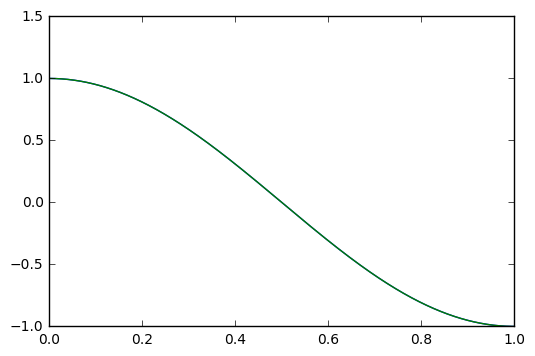

In [230]:
ans = lambda x: cos(pi*x)
tspan = linspace(0,1,100000)
plt.plot(tspan,polyval(Y,tspan),tspan,ans(tspan))
plt.show()

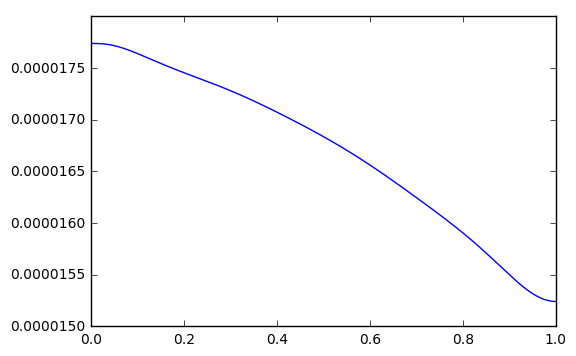

In [231]:
plt.plot(tspan,abs(polyval(Y,tspan)-ans(tspan)))
plt.show()

In [173]:
xi

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]